In [122]:
import numpy as np
from matplotlib import pyplot as plt

In [237]:
def numerov(psi_range,x_range,V,E,direction):
    """psi_range = array contenant les psi_i avec les valeurs aux bords déjà mises en place 
    x_range = array contenant les x
    V = fonction jouant le role de potentiel
    E = energie à tester
    direction -> 1 = gauche/droite  -1=droite/gauche"""
    
    #création de variables utiles
    Q = lambda x : 2*(E-V(x))
    h = x_range[1]-x_range[0]  
    psi_out = psi_range.copy()
    
    #réalisation de l'intégration de Numerov
    if direction == 1 :
        for i in range(2,len(psi_range)):
            psi_out[i] = (2*(1-5/12*h**2*Q(x_range[i-1]))*psi_out[i-1]-(1+1/12*h**2*Q(x_range[i-2]))*psi_out[i-2])/(1+1/12*h**2*Q(x_range[i]))
    if direction == -1 :
        for i in range(len(psi_range)-3,-1,-1):
            psi_out[i] = (2*(1-5/12*h**2*Q(x_range[i+1]))*psi_out[i+1]-(1+1/12*h**2*Q(x_range[i+2]))*psi_out[i+2])/(1+1/12*h**2*Q(x_range[i]))
    
    return psi_out
V_0 = 5
x0=1
a = 2
a1=1
a2=0.9
def V1(x):
        return -V_0/2*(1-np.sign(np.abs(x)-a))
def V2(x):
        return V_0*(x/a)**2
def V3(x):
        return V_0*( (a1/x)**12-(a1/x)**6 )
def V4(x):
        return V_0*((1-np.exp(-a*(x-x0)))**2)
def integrale(F,X):
    sum=0
    for i in range (0,len(F)-1):
        sum+=(X[i+1]-X[i])*F[i]
    return sum

(-10.0, 20.0)

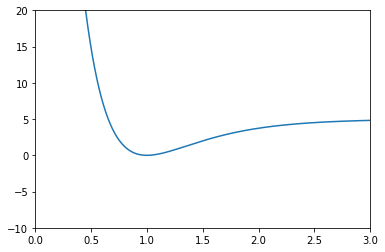

In [239]:
x_m=0
x_M=3
dx=10**(-2)
eps=dx*10**(-5)
x_range = np.linspace(x_m,x_M,int((x_M-x_m)/dx))
plt.plot(x_range,V4(x_range))
plt.xlim(0,3)
plt.ylim(-10,20)

In [212]:
x_m=0.1
x_M=10
psi_x_m =0
psi_x_M =0
dx=10**(-2)
eps=dx*10**(-5)
E=-4.770734932405
x_range = np.linspace(x_m,x_M,int((x_M-x_m)/dx))
psi_range = np.zeros(int((x_M-x_m)/dx))
psi_range[0] = 0
psi_range[1] = eps

(0.0, 10.0)

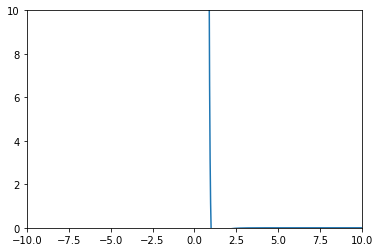

In [213]:
temp = -1
normalisation = 80000
plt.plot(x_range[0:temp],V3(x_range[0:temp]))
#out = numerov(psi_range,x_range,V2,E,1)
#plt.plot(x_range[0:temp],out[0:temp]/normalisation)
plt.xlim(-10,10)
plt.ylim(0,10)

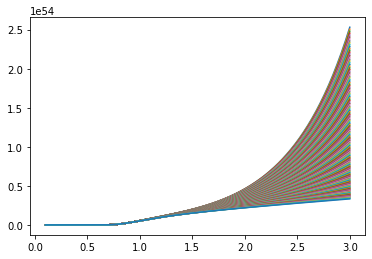

In [220]:
E_min=-1.5
E_max=0
dE=0.01
V=V3
N_E=int((E_max-E_min)/dE+1)
E_range=np.linspace(E_min,E_max,N_E)
I=[]
Y_last=[]
Z_last=[]
for E in E_range:
    x_range = np.linspace(x_m,x_M,int((x_M-x_m)/dx))
    psi_range = np.zeros(int((x_M-x_m)/dx))
    psi_range[0] = 0
    psi_range[1] = eps
    #I.append(integrale(psi_range,x_range))
    out=numerov(psi_range,x_range,V,E,1)
    Y_last.append(abs(out[-1]))
    Z_last.append(np.log(abs(out[-1])))
    if(abs(Y_last[-1])<10**73):
        plt.plot(x_range,out)

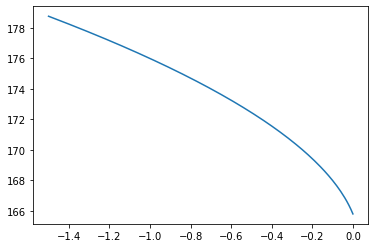

In [145]:
plt.plot(E_range,np.abs(Z_last))

In [94]:
E_value=[]
for i in range (1,N_E-1):
    if Z_last[i]<Z_last[i+1] and Z_last[i]<Z_last[i-1]:
        E_value.append(E_range[i])
E_value[0]

IndexError: list index out of range

In [63]:
V=V3 #potentiel utilisé
Nb_passage=40 #nombre de passage effectuées
It_passage=30 #nombre d'iterations effectuées à chaque passage (doit être > 4)
zoom=2 # valeur de l'augmentation de precision entre chaque passage
E_min=0.1 #valeur de depart de recherche de l'energie
dE=0.01 #pas de depart de l'energie
x_m=-10
x_M=10
dx=10**(-2)
dichotomie(V,Nb_passage,It_passage,zoom,E_min,dE)

Afficher les solutions intermédiaires ? (y/n) y


Passage 1 :  0.2  Precision:  1
Passage 2 :  0.2  Precision:  0.5
Passage 3 :  0.2025  Precision:  0.25
Passage 4 :  0.20375000000000001  Precision:  0.125
Passage 5 :  0.204375  Precision:  0.0625
Passage 6 :  0.2046875  Precision:  0.03125
Passage 7 :  0.20484375  Precision:  0.015625
Passage 8 :  0.20484375  Precision:  0.0078125
Passage 9 :  0.204921875  Precision:  0.00390625
Passage 10 :  0.204921875  Precision:  0.001953125
Passage 11 :  0.204931640625  Precision:  0.0009765625
Passage 12 :  0.20494140624999999  Precision:  0.00048828125
Passage 13 :  0.20494140624999999  Precision:  0.000244140625
Passage 14 :  0.20494262695312498  Precision:  0.0001220703125
Passage 15 :  0.2049432373046875  Precision:  6.103515625e-05
Passage 16 :  0.20494354248046875  Precision:  3.0517578125e-05
Passage 17 :  0.20494369506835938  Precision:  1.52587890625e-05
Passage 18 :  0.20494384765625  Precision:  7.62939453125e-06
Passage 19 :  0.20494384765625  Precision:  3.814697265625e-06
Passage 

In [10]:
def dichotomie (V,Nb_passage,It_passage,zoom,E_min,dE):
    """
    V=potentiel
    Nb_passage=nombre de passage effectuées
    It_passage=nombre d'iterations effectuées à chaque passage (doit être > 4)
    zoom=valeur de l'augmentation de precision entre chaque passage
    E_min=valeur de depart de recherche de l'energie
    dE=pas de depart de l'energie 
    """
    affiche=input("Afficher les solutions intermédiaires ? (y/n)")
    
    x_m=-10
    x_M=10
    dx=10**(-2)
    
    x_range = np.linspace(x_m,x_M,int((x_M-x_m)/dx))
    psi_zero=np.zeros(int((x_M-x_m)/dx))
    precision=1
    for passage in range(0,Nb_passage):
        E=E_min 
        Z_last=[] # contient la dernière valeur de chaque fonction d'onde (en log)

        #remise à 0 de la fonction d'onde
        psi_range = psi_zero
        psi_range[0] = 0
        psi_range[1] = eps

        out=numerov(psi_range,x_range,V,E-2*dE,1)# -2*dE pour ne pas louper la valeur si elle est trouvée à la 1ere iteration et pour generer 2 valeurs
        Z_last.append(np.log(abs(out[-1])))
        out=numerov(psi_range,x_range,V,E-dE,1)
        Z_last.append(np.log(abs(out[-1])))

        for it in range(0,It_passage):
            #remise à 0 de la fonction d'onde
            psi_range = psi_zero
            psi_range[0] = 0
            psi_range[1] = eps

            out=numerov(psi_range,x_range,V,E,1)
            Z_last.append(np.log(abs(out[-1])))

            #print(E,"  ",E_min,"  ",Z_last[-2],"  ")
            E+=dE
        #print( "\n ",Z_last[np.argmin(Z_last) ])
        E_min+=np.argmin(Z_last)*dE-3*dE
        if affiche=="y":
            print("Passage",passage+1,": ",E_min," Precision: ",precision)
        dE=dE/zoom
        precision/=zoom